In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)


In [3]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD(
        [
            {'params':net[0].weight, 'weight_decay':wd},
            {'params':net[0].bias}
        ],
        lr=lr
    )
    animator = d2l.Animator(xlabel='epoch', 
                            ylabel='loss', 
                            yscale='log',
                            xlim=[5,num_epochs],
                            legend=['train', 'test']
                           )
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, 
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)
                         )
                        )
    print("w的L2范数是：", net[0].weight.norm().item())
            

```python
net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.paramers():
        param.data.normal_()这
```

这段代码创建了一个简单的神经网络模型 `net`，然后对模型的参数进行了初始化。

具体解释如下：

```python
net = nn.Sequential(nn.Linear(num_inputs, 1))
```
这行代码定义了一个包含一个线性层的神经网络模型 `net`。`nn.Sequential` 是一个顺序容器，可以将网络的各层按顺序排列。在这里，使用了一个线性层 `nn.Linear(num_inputs, 1)`，该线性层的输入大小为 `num_inputs`，输出大小为 1。

```python
for param in net.parameters():
    param.data.normal_()
```
这个循环遍历了神经网络模型 `net` 中的所有参数，并对参数进行了正态分布的初始化。

- `net.parameters()`: 这是一个生成器，用于返回模型 `net` 中所有的参数。
- `param.data.normal_()`: 对参数 `param` 的值进行正态分布的初始化。`normal_()` 是 PyTorch 张量的方法，用于将张量中的值初始化为从标准正态分布（均值为 0，标准差为 1）中随机采样而来的值。

因此，这段代码的作用是创建了一个包含一个线性层的神经网络模型 `net`，并对该模型中的参数进行了正态分布的初始化。

loss = nn.MSELoss(reduction='none')

这行代码创建了一个用于计算均方误差（MSE）损失的损失函数对象 `loss`，并且指定了 `reduction='none'`，表示不对损失值进行任何归约操作。

具体解释如下：

```python
loss = nn.MSELoss(reduction='none')
```

- `nn.MSELoss`: 这是 PyTorch 中的均方误差（MSE）损失函数，用于计算预测值和真实值之间的平方差，并且对所有样本的损失值进行了均值计算。在这里，我们创建了一个 MSE 损失函数的对象，并赋值给变量 `loss`。

- `reduction='none'`: 这是损失函数的一个参数，用于指定损失值的归约方式。`'none'` 表示不进行任何归约操作，即保留每个样本的损失值而不对其进行求和或求平均。这样设置的目的可能是为了在某些情况下需要单独处理每个样本的损失值，例如在特定的损失函数设计或模型评估中。

```python
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
```
这段代码是一个典型的训练循环，用于训练一个深度学习模型。让我们逐行解释：

```python
for epoch in range(num_epochs):
```
这个循环迭代训练过程中的每个 epoch（周期），`num_epochs` 表示总共的训练周期数。

```python
    for X, y in train_iter:
```
这个嵌套循环遍历了训练数据集 `train_iter` 中的每个批次。`X` 表示输入特征，`y` 表示对应的标签。

```python
        trainer.zero_grad()
```
在每个批次开始时，调用 `trainer.zero_grad()` 将模型参数的梯度清零，因为默认情况下 PyTorch 会累积梯度。

```python
        l = loss(net(X), y)
```
计算模型在当前批次上的预测结果，并将预测结果 `net(X)` 和真实标签 `y` 输入到损失函数 `loss` 中计算损失值 `l`。这里假设 `net` 是一个能够接受输入并给出预测结果的神经网络模型。

```python
        l.mean().backward()
```
通过调用 `l.mean().backward()` 对损失值 `l` 进行求平均并计算其梯度。这个操作使用自动微分功能计算损失函数相对于模型参数的梯度。

```python
        trainer.step()
```
利用优化器 `trainer` 根据计算得到的梯度来更新模型参数，使得损失函数值逐渐减小。这个过程通常使用梯度下降算法或其变种来实现。

综上所述，这段代码是一个完整的训练循环，用于迭代地训练深度学习模型。在每个 epoch 中，它遍历训练数据集的所有批次，计算损失函数并更新模型参数，以使模型逐渐学习到训练数据的特征和标签之间的映射关系。

w的L2范数是： 13.936355590820312


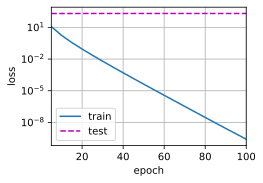

In [4]:
train_concise(wd=0)

w的L2范数是： 0.3532606065273285


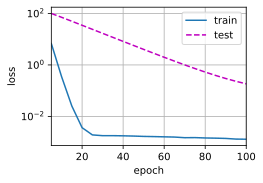

In [5]:
train_concise(wd=3)